In [1]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

In [2]:
# BNB fund amount
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

# fee in real:
FREE_REAL = Decimal('.01')

A_LIMIT = Decimal('.01')
B_LIMIT = Decimal('.0001')

A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []

In [3]:
def buy():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, FREE_REAL
    # buy A sell B:
#     print("buy with price {}".format(PRICE))
    sell_amount_B = B_FUND_AMOUNT - (B_FUND_AMOUNT % B_LIMIT)
    
    cost = (sell_amount_B * FREE_REAL) / PRICE

    B_FUND_AMOUNT -= sell_amount_B
    A_FUND_AMOUNT += (sell_amount_B / PRICE - cost)

In [4]:
def sell():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, FREE_REAL
    # buy B sell A:
#     print("sell with price {}".format(PRICE))
    sell_amount_A = A_FUND_AMOUNT - (A_FUND_AMOUNT % A_LIMIT)

    cost = sell_amount_A * FREE_REAL * PRICE

    A_FUND_AMOUNT -= sell_amount_A
    B_FUND_AMOUNT += (sell_amount_A * PRICE - cost)

# Visualized data

In [5]:
test_file = '/home/nam/data/ccxt/extra/BTC_USDT_binance_1h.csv'

In [6]:
import pandas as pd
df = pd.read_csv(test_file)
df

Unnamed: 0      Timestamp     Open     High      Low    Close  \
0             266  1503900000000  4223.80  4282.07  4199.01  4221.04   
1             267  1503903600000  4221.04  4297.11  4207.42  4261.90   
2             268  1503907200000  4261.90  4305.00  4239.15  4252.70   
3             269  1503910800000  4252.70  4298.83  4226.93  4227.00   
4             270  1503914400000  4240.00  4317.21  4240.00  4290.77   
5             271  1503918000000  4290.77  4365.40  4288.07  4308.00   
6             272  1503921600000  4309.00  4347.00  4271.86  4280.00   
7             273  1503925200000  4280.00  4347.00  4279.82  4347.00   
8             274  1503928800000  4295.32  4320.90  4279.82  4291.13   
9             275  1503932400000  4291.13  4315.00  4271.03  4273.59   
10            276  1503936000000  4317.20  4341.99  4273.59  4322.65   
11            277  1503939600000  4322.65  4370.45  4313.66  4324.67   
12            278  1503943200000  4324.64  4362.99  4307.22  4312.70   
13            279  1503946800000  4312.69  4361.37  4312.69  4321.65   
14            280  1503950400000  4321.65  4339.80  4290.18  4312.43   
15            281  1503954000000  4312.43  4349.98  4312.43  4331.47   
16            282  1503957600000  4346.76  4399.82  4331.45  4353.32   
17            283  1503961200000  4353.32  4386.69  4350.70  4386.69   
18            284  1503964800000  4353.65  4386.68  4331.46  4349.44   
19            285  1503968400000  4349.44  4386.69  4331.47  4349.54   
20            286  1503972000000  4349.55  4359.99  4314.35  4314.78   
21            287  1503975600000  4359.99  4383.99  4315.93  4376.99   
22            288  1503979200000  4363.48  4383.98  4358.50  4363.16   
23            289  1503982800000  4363.16  4404.05  4343.49  4356.76   
24            290  1503986400000  4356.76  4389.49  4343.48  4363.21   
25            291  1503990000000  4389.44  4404.07  4313.55  4329.02   
26            292  1503993600000  4328.12  4382.99  4328.12  4352.52   
27            293  1503997200000  4352.52  4379.99  4329.59  4367.40   
28            294  1504000800000  4367.40  4368.47  4329.57  4346.86   
29            295  1504004400000  4346.86  4417.61  4333.20  4368.50   
...           ...            ...      ...      ...      ...      ...   
17475       17753  1567188000000  9523.45  9547.99  9486.55  9509.75   
17476       17754  1567191600000  9509.75  9592.00  9450.35  9571.66   
17477       17755  1567195200000  9572.13  9696.00  9572.13  9621.40   
17478       17756  1567198800000  9621.40  9625.00  9578.17  9584.25   
17479       17757  1567202400000  9584.96  9612.59  9567.09  9594.57   
17480       17758  1567206000000  9594.57  9638.00  9555.00  9584.54   
17481       17759  1567209600000  9582.76  9614.29  9566.42  9597.43   
17482       17760  1567213200000  9597.53  9652.00  9590.60  9626.08   
17483       17761  1567216800000  9625.05  9655.77  9610.00  9621.02   
17484       17762  1567220400000  9620.97  9639.54  9601.65  9611.26   
17485       17763  1567224000000  9611.02  9624.21  9585.01  9614.04   
17486       17764  1567227600000  9612.88  9625.00  9594.03  9616.59   
17487       17765  1567231200000  9616.62  9618.58  9580.32  9589.84   
17488       17766  1567234800000  9588.03  9615.00  9576.71  9591.58   
17489       17767  1567238400000  9588.25  9591.60  9541.00  9556.00   
17490       17768  1567242000000  9557.00  9583.23  9520.58  9568.84   
17491       17769  1567245600000  9568.84  9588.67  9554.04  9571.13   
17492       17770  1567249200000  9571.48  9575.00  9535.43  9553.85   
17493       17771  1567252800000  9553.22  9604.06  9545.61  9591.30   
17494       17772  1567256400000  9592.57  9610.00  9570.03  9591.46   
17495       17773  1567260000000  9592.84  9593.05  9555.23  9570.38   
17496       17774  1567263600000  9573.06  9596.77  9561.80  9595.00   
17497       17775  1567267200000  9594.96  9603.00  9564.36  9597.13   
17498       17776  1567270800000  9597.13  9627

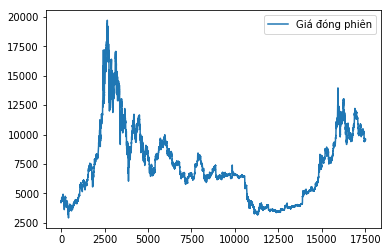

In [7]:
# for ts, price in df[['Timestamp', 'Close']].values:
#     print(ts, price)

    
plt.plot(df.Close, label='Giá đóng phiên')
plt.legend()
plt.show()

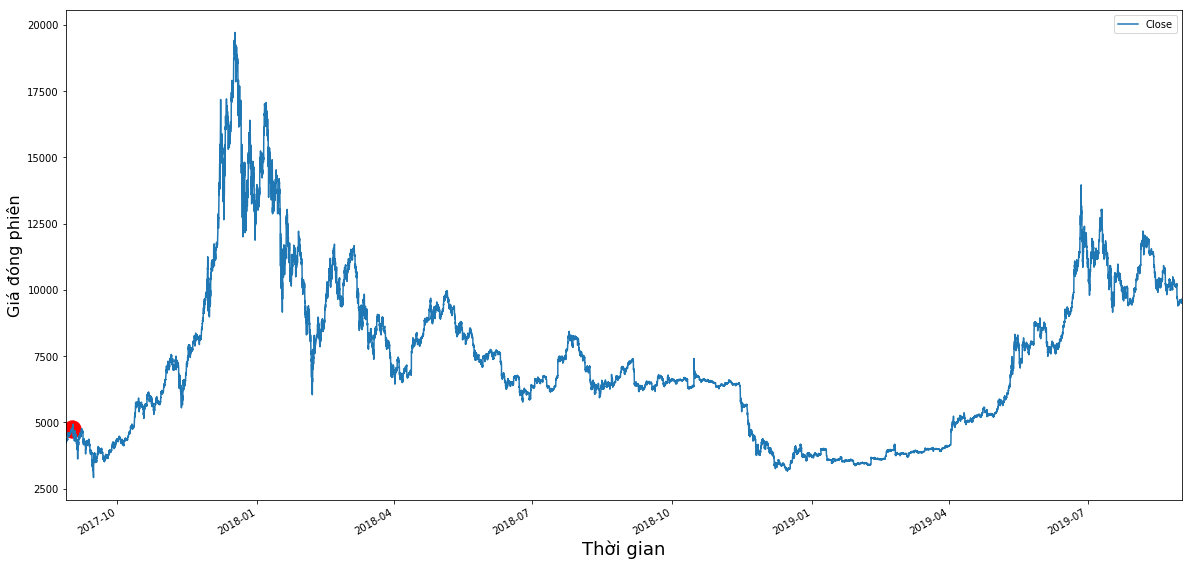

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
df['ts'] = pd.to_datetime(df['Timestamp'], unit='ms')
df[['ts', 'Close']].set_index('ts').plot()

plt.scatter([df.ts[100]], [df.Close[100]], s= 300, facecolor='red')
plt.legend()
plt.xlabel('Thời gian', fontsize=18)
plt.ylabel('Giá đóng phiên', fontsize=16)
plt.show()

In [9]:
def strategy_01_current_price(threshold = 0.01):
    fee_assume = Decimal(threshold)
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, Close_lst, Ts_lst
    global A_FUND_AMOUNT_LIST, B_FUND_AMOUNT_LIST, PRICE_LIST, SELL_TS, SELL_PRICE, BUY_TS, BUY_PRICE
    A_FUND_AMOUNT = Decimal('1.0')
    B_FUND_AMOUNT = Decimal('0.0')
    A_FUND_AMOUNT_LIST = []
    B_FUND_AMOUNT_LIST = []
    
    PRICE_LIST = []
    SELL_TS = []; BUY_TS = []; SELL_PRICE = []; BUY_PRICE = []
    PRICE = Decimal(str(Close_lst[0]))
    PREV_SIDE = 'buy'
    for NEW_PRICE, ts in zip(Close_lst[1:], Ts_lst[1:]):
        NEW_PRICE = Decimal(str(NEW_PRICE))
        if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume) and PREV_SIDE == 'buy':
            PRICE = NEW_PRICE
            sell()

            PREV_SIDE = 'sell'
            PRICE_LIST.append(PRICE)
            SELL_TS.append(ts)
            SELL_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            

        elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume) and PREV_SIDE == 'sell':
            PRICE = NEW_PRICE
            buy()

            PREV_SIDE = 'buy'
            PRICE_LIST.append(PRICE)
            BUY_TS.append(ts)
            BUY_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)


    print("Number of trade: ", len(A_FUND_AMOUNT_LIST))

    print(A_FUND_AMOUNT, "  BTC")
    print(B_FUND_AMOUNT, "  USDT")

    print("Previous amount USDT is ", Decimal('1.0') *
          Decimal(Close_lst[0]), "  USDT")
    print("Current amount USDT is  ", A_FUND_AMOUNT *
          Decimal(Close_lst[-1]) + B_FUND_AMOUNT, "  USDT")

In [10]:
from copy import deepcopy

def draw_simulation(img_out = None, from_idx = -1, to_idx = -1):
    global SELL_PRICE,SELL_TS, BUY_PRICE, BUY_TS, df
    plt.rcParams["figure.figsize"] = (20,10)
    
    df_tmp = deepcopy(df)
    
    if from_idx != -1 and to_idx !=-1:
        df_tmp = df[from_idx:to_idx]
        
    df_tmp['ts'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df_tmp[['ts', 'Close']].set_index('ts').plot()

    plt.scatter(SELL_TS, SELL_PRICE, s= 300, facecolor='green')
    
    plt.scatter(BUY_TS, BUY_PRICE, s= 300, facecolor='red')
    plt.legend()
    plt.xlabel('Thời gian', fontsize=18)
    plt.ylabel('Giá đóng phiên', fontsize=16)
    
    if img_out:
        plt.savefig('figures/' + img_out)
        
    plt.show()

# Modify threshold and compare

Number of trade:  7
0.008043743671646966335529891   BTC
6056.484192000000000000000000   USDT
Previous amount USDT is  4221.039999999999963620211929   USDT
Current amount USDT is   6133.603343139605135065568343   USDT


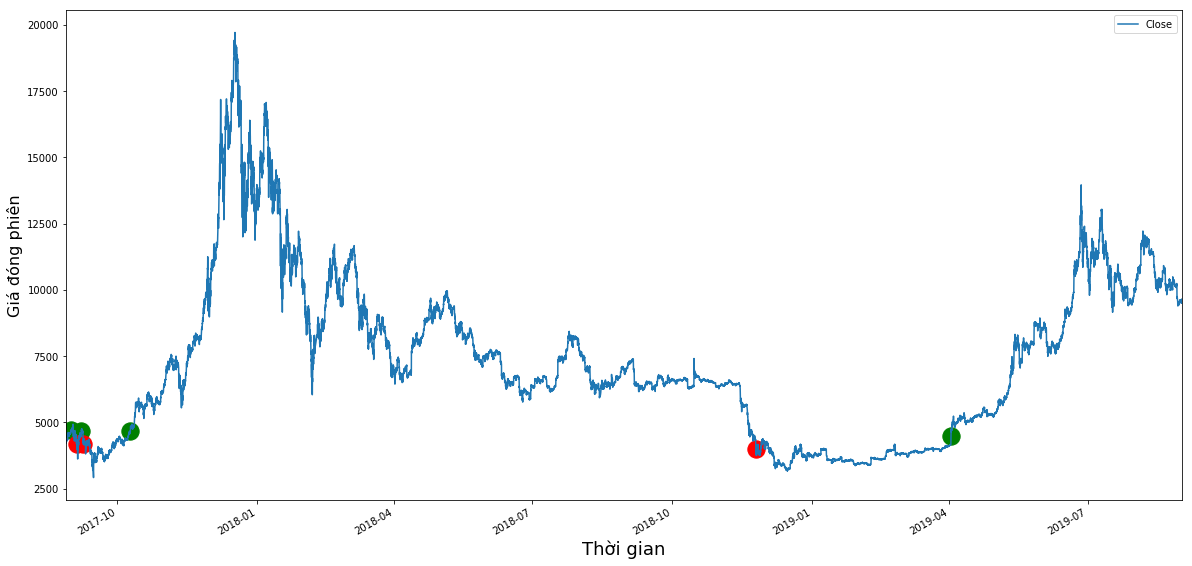

In [11]:
Close_lst = df.Close.values
Ts_lst = df.ts.values
strategy_01_current_price(threshold = 0.1)
draw_simulation("profitable.png")

Number of trade:  6
1.403081315728755372949636041   BTC
0.00005000000000000000000   USDT
Previous amount USDT is  14975.03000000000065483618528   USDT
Current amount USDT is   13452.00007210996935670503063   USDT


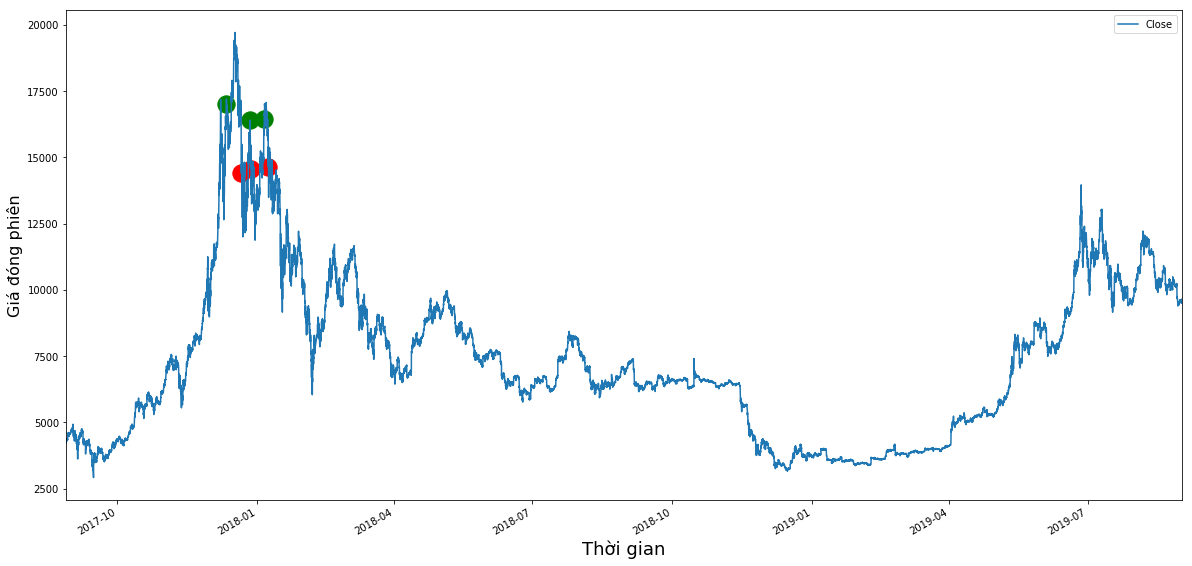

In [12]:
Close_lst = df.Close.values[2500:]
Ts_lst = df.ts.values[2500:]
strategy_01_current_price(threshold = 0.1)
draw_simulation("losable.png")

Number of trade:  6
1.403081315728755372949636041   BTC
0.00005000000000000000000   USDT
Previous amount USDT is  14975.03000000000065483618528   USDT
Current amount USDT is   13452.00007210996935670503063   USDT


/home/nam/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


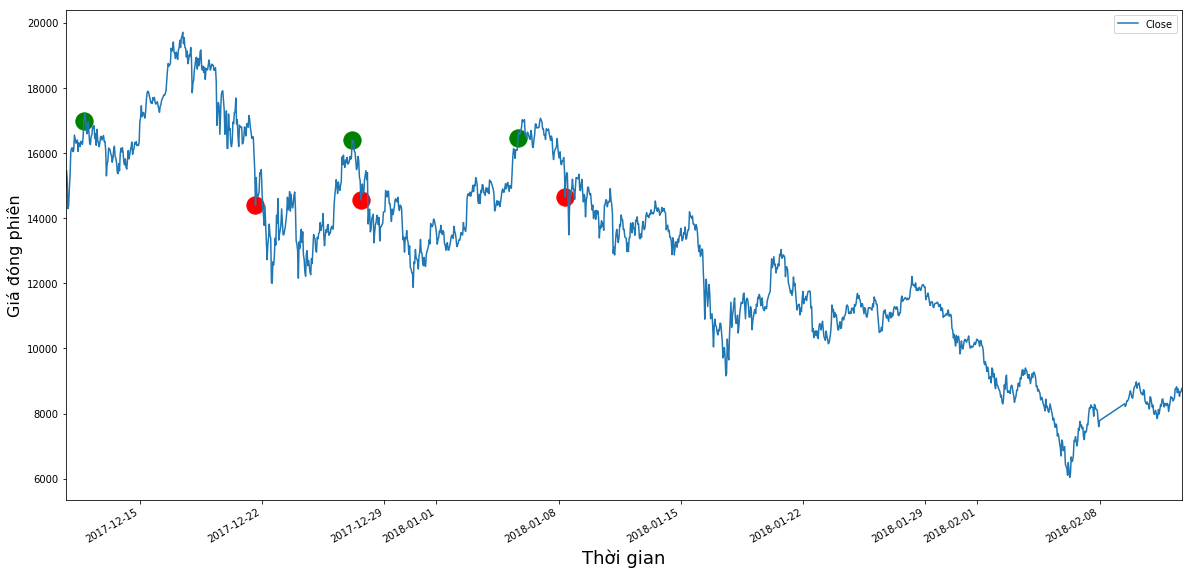

In [18]:
Close_lst = df.Close.values[2500:]
Ts_lst = df.ts.values[2500:]
strategy_01_current_price(threshold = 0.1)
draw_simulation("losable_zoom.png",from_idx=2500, to_idx=4000)

In [15]:
from copy import deepcopy

def draw_simulation_small_dot(img_out = None, from_idx = -1, to_idx = -1):
    global SELL_PRICE,SELL_TS, BUY_PRICE, BUY_TS, df
    plt.rcParams["figure.figsize"] = (20,10)
    
    df_tmp = deepcopy(df)
    
    if from_idx != -1 and to_idx !=-1:
        df_tmp = df[from_idx:to_idx]
        
    df_tmp['ts'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df_tmp[['ts', 'Close']].set_index('ts').plot()

    plt.scatter(SELL_TS, SELL_PRICE, s= 30, facecolor='green')
    
    plt.scatter(BUY_TS, BUY_PRICE, s= 30, facecolor='red')
    plt.legend()
    plt.xlabel('Thời gian', fontsize=18)
    plt.ylabel('Giá đóng phiên', fontsize=16)
    
    if img_out:
        plt.savefig('figures/' + img_out)
        
    plt.show()

Number of trade:  13
0.006032781052918442051335045   BTC
15938.01005200000000000000000   USDT
Previous amount USDT is  14975.03000000000065483618528   USDT
Current amount USDT is   16036.06590998916789102955679   USDT


/home/nam/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


ValueError: Unrecognizable date '2017-12-10T19:00:00.000000000'

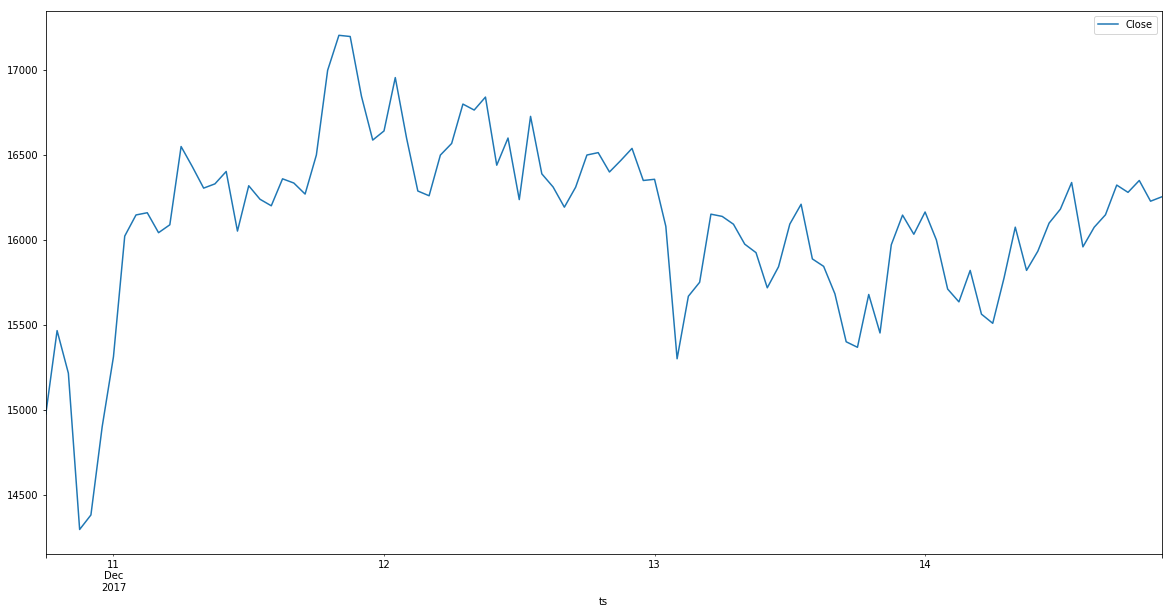

In [23]:
Close_lst = df.Close.values[2500:2600]
Ts_lst = df.ts.values[2500:2600]
strategy_01_current_price(threshold = 0.01)
draw_simulation_small_dot("strategy_01_describe.png",from_idx=2500, to_idx=2600)

In [28]:
pre_csv = '/home/nam/data/ccxt/preprocessing_data/BTC_USDT_binance_1h.csv'
df_xx = pd.read_csv(pre_csv)
df_xx

Unnamed: 0      Timestamp     Open     High      Low    Close  \
0               1  1503903600000  4221.04  4297.11  4207.42  4261.90   
1               2  1503907200000  4261.90  4305.00  4239.15  4252.70   
2               3  1503910800000  4252.70  4298.83  4226.93  4227.00   
3               4  1503914400000  4240.00  4317.21  4240.00  4290.77   
4               5  1503918000000  4290.77  4365.40  4288.07  4308.00   
5               6  1503921600000  4309.00  4347.00  4271.86  4280.00   
6               7  1503925200000  4280.00  4347.00  4279.82  4347.00   
7               8  1503928800000  4295.32  4320.90  4279.82  4291.13   
8               9  1503932400000  4291.13  4315.00  4271.03  4273.59   
9              10  1503936000000  4317.20  4341.99  4273.59  4322.65   
10             11  1503939600000  4322.65  4370.45  4313.66  4324.67   
11             12  1503943200000  4324.64  4362.99  4307.22  4312.70   
12             13  1503946800000  4312.69  4361.37  4312.69  4321.65   
13             14  1503950400000  4321.65  4339.80  4290.18  4312.43   
14             15  1503954000000  4312.43  4349.98  4312.43  4331.47   
15             16  1503957600000  4346.76  4399.82  4331.45  4353.32   
16             17  1503961200000  4353.32  4386.69  4350.70  4386.69   
17             18  1503964800000  4353.65  4386.68  4331.46  4349.44   
18             19  1503968400000  4349.44  4386.69  4331.47  4349.54   
19             20  1503972000000  4349.55  4359.99  4314.35  4314.78   
20             21  1503975600000  4359.99  4383.99  4315.93  4376.99   
21             22  1503979200000  4363.48  4383.98  4358.50  4363.16   
22             23  1503982800000  4363.16  4404.05  4343.49  4356.76   
23             24  1503986400000  4356.76  4389.49  4343.48  4363.21   
24             25  1503990000000  4389.44  4404.07  4313.55  4329.02   
25             26  1503993600000  4328.12  4382.99  4328.12  4352.52   
26             27  1503997200000  4352.52  4379.99  4329.59  4367.40   
27             28  1504000800000  4367.40  4368.47  4329.57  4346.86   
28             29  1504004400000  4346.86  4417.61  4333.20  4368.50   
29             30  1504008000000  4368.50  4436.94  4347.59  4408.08   
...           ...            ...      ...      ...      ...      ...   
17473       17474  1567184400000  9567.90  9575.98  9522.76  9522.78   
17474       17475  1567188000000  9523.45  9547.99  9486.55  9509.75   
17475       17476  1567191600000  9509.75  9592.00  9450.35  9571.66   
17476       17477  1567195200000  9572.13  9696.00  9572.13  9621.40   
17477       17478  1567198800000  9621.40  9625.00  9578.17  9584.25   
17478       17479  1567202400000  9584.96  9612.59  9567.09  9594.57   
17479       17480  1567206000000  9594.57  9638.00  9555.00  9584.54   
17480       17481  1567209600000  9582.76  9614.29  9566.42  9597.43   
17481       17482  1567213200000  9597.53  9652.00  9590.60  9626.08   
17482       17483  1567216800000  9625.05  9655.77  9610.00  9621.02   
17483       17484  1567220400000  9620.97  9639.54  9601.65  9611.26   
17484       17485  1567224000000  9611.02  9624.21  9585.01  9614.04   
17485       17486  1567227600000  9612.88  9625.00  9594.03  9616.59   
17486       17487  1567231200000  9616.62  9618.58  9580.32  9589.84   
17487       17488  1567234800000  9588.03  9615.00  9576.71  9591.58   
17488       17489  1567238400000  9588.25  9591.60  9541.00  9556.00   
17489       17490  1567242000000  9557.00  9583.23  9520.58  9568.84   
17490       17491  1567245600000  9568.84  9588.67  9554.04  9571.13   
17491       17492  1567249200000  9571.48  9575.00  9535.43  9553.85   
17492       17493  1567252800000  9553.22  9604.06  9545.61  9591.30   
17493       17494  1567256400000  9592.57  9610.00  9570.03  9591.46   
17494       17495  1567260000000  9592.84  9593.05  9555.23  9570.38   
17495       17496  1567263600000  9573.06  9596.77  9561.80  9595.00   
17496       17497  1567267200000  9594.96  9603

In [30]:
sum(df_xx.trend == 1)

9051

In [31]:
9051 + 8452

17503

In [9]:
# Sine function GIF example